7113056098 王崧丞 DRL-hw1-1

結果網頁:

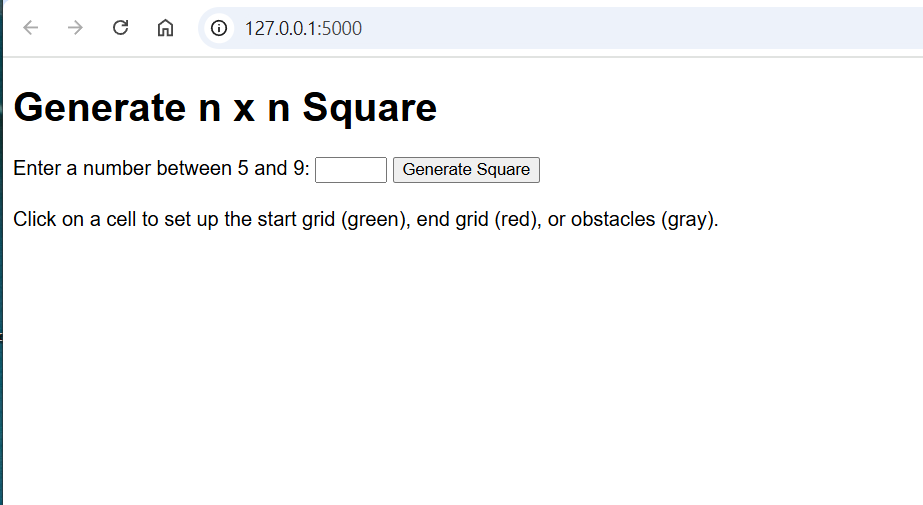

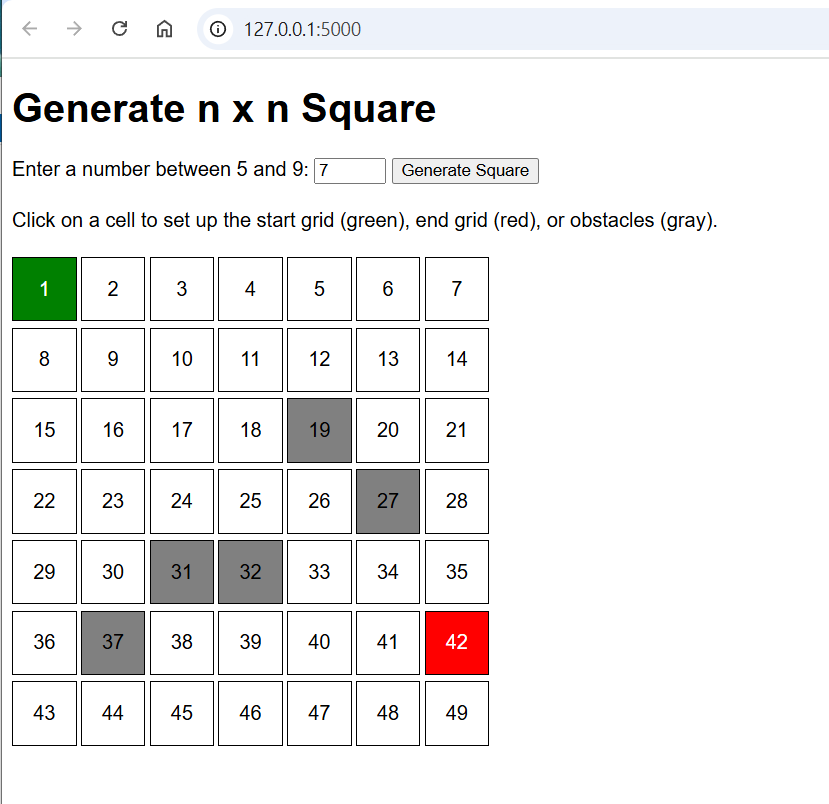



prompt

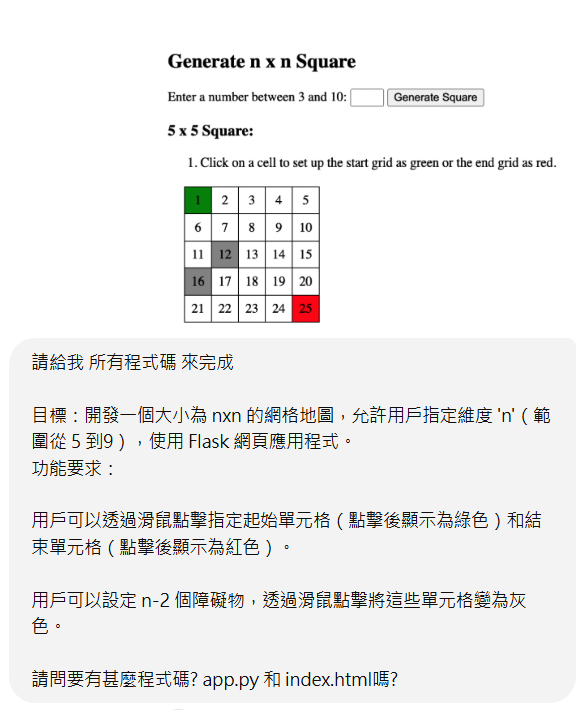

GPT:

是的，你需要以下檔案來完成這個 Flask 網頁應用：

app.py（後端 Flask 伺服器）

templates/index.html（前端 HTML 介面）

static/style.css（可選的 CSS 樣式表）

static/script.js（前端 JavaScript 處理點擊事件）

1. app.py（Flask 伺服器）

這個檔案負責啟動 Flask 伺服器，渲染 index.html，以及處理 AJAX 請求來更新網格狀態。



In [ ]:
from flask import Flask, render_template, request, jsonify

app = Flask(__name__)

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/update_grid', methods=['POST'])
def update_grid():
    data = request.json
    return jsonify({"message": "Grid updated successfully!", "data": data})

if __name__ == '__main__':
    app.run(debug=True)


2. templates/index.html（前端 HTML 介面）

這個檔案負責顯示網頁，並包含一個輸入框讓用戶設定 n 的大小，以及用戶可以點擊的 n x n 網格。

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Grid Selector</title>
    <link rel="stylesheet" href="{{ url_for('static', filename='style.css') }}">
</head>
<body>
    <h1>Generate n x n Square</h1>
    <label>Enter a number between 5 and 9:</label>
    <input type="number" id="gridSize" min="5" max="9">
    <button onclick="generateGrid()">Generate Square</button>

    <h2 id="gridTitle"></h2>
    <p>Click on a cell to set up the start grid (green), end grid (red), or obstacles (gray).</p>

    <div id="grid-container"></div>

    <script src="{{ url_for('static', filename='script.js') }}"></script>
</body>
</html>


3. static/style.css（CSS 樣式表）

這個檔案提供基礎的樣式，讓網格顯示整齊。

In [ ]:
body {
    font-family: Arial, sans-serif;
}

#grid-container {
    display: grid;
    gap: 5px;
    margin-top: 20px;
}

.cell {
    width: 50px;
    height: 50px;
    display: flex;
    align-items: center;
    justify-content: center;
    border: 1px solid black;
    font-size: 16px;
    cursor: pointer;
}

.start { background-color: green; color: white; }
.end { background-color: red; color: white; }
.obstacle { background-color: gray; }


4. static/script.js（JavaScript 邏輯）

這個檔案負責動態生成網格，並處理用戶點擊事件來設定起點、終點和障礙物。

In [ ]:
let gridSize = 5;
let startSet = false;
let endSet = false;
let obstacles = 0;
let maxObstacles = 0;

function generateGrid() {
    gridSize = parseInt(document.getElementById("gridSize").value);
    if (isNaN(gridSize) || gridSize < 5 || gridSize > 9) {
        alert("Please enter a number between 5 and 9.");
        return;
    }

    maxObstacles = gridSize - 2;
    startSet = false;
    endSet = false;
    obstacles = 0;

    const container = document.getElementById("grid-container");
    container.innerHTML = "";
    container.style.gridTemplateColumns = `repeat(${gridSize}, 50px)`;

    for (let i = 0; i < gridSize * gridSize; i++) {
        const cell = document.createElement("div");
        cell.classList.add("cell");
        cell.textContent = i + 1;
        cell.dataset.index = i;
        cell.addEventListener("click", () => handleCellClick(cell));
        container.appendChild(cell);
    }
}

function handleCellClick(cell) {
    if (!startSet) {
        cell.classList.add("start");
        startSet = true;
    } else if (!endSet && !cell.classList.contains("start")) {
        cell.classList.add("end");
        endSet = true;
    } else if (obstacles < maxObstacles && !cell.classList.contains("start") && !cell.classList.contains("end")) {
        cell.classList.add("obstacle");
        obstacles++;
    }
}


prompt:

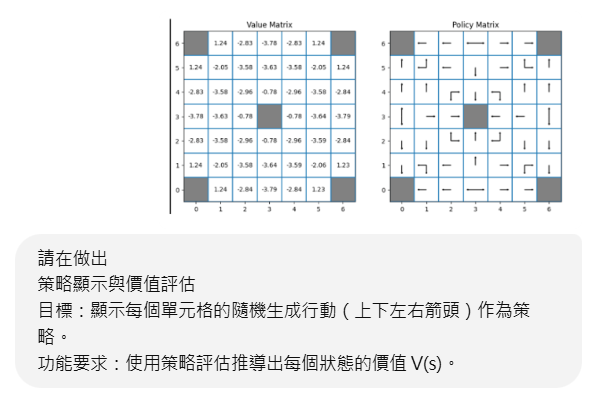